In [1]:
import numpy as np

In [2]:
bin_hex_l={"0":'0000',"1":'0001',"2":'0010',
    "3":'0011',
    "4":'0100',
    "5":'0101',
    "6":'0110',
    "7":'0111',
    "8":'1000',
    "9":'1001',
    "A":'1010',
    "B":'1011',
    "C":'1100',
    "D":'1101',
    "E":'1110',
    "F":'1111'
}
hex_bin_d=[bin_hex_l[i] for i in bin_hex_l]
def bin_hex(k):
    return list(bin_hex_l.keys())[hex_bin_d.index(str(k))]
def hex_bin(k):
    return bin_hex_l[str(k)]

In [3]:
def bin_dec(k):
    dec=0
    for i in range(len(str(k))):
        dec+=(k%10)*(2**i)
        k=int(k/10)
    return dec    
def dec_bin(k):
    i=0
    b=0
    while True:
        b+=(k%2)*(10**i)
        k=int(k/2)
        i+=1
        if(k==0):
            break
    return b        

In [4]:
ini_per=np.array([58, 50, 42, 34, 26, 18, 10, 2, 
                             60, 52, 44, 36, 28, 20, 12, 4, 
                             62, 54, 46, 38, 30, 22, 14, 6, 
                             64, 56, 48, 40, 32, 24, 16, 8, 
                             57, 49, 41, 33, 25, 17, 9, 1, 
                             59, 51, 43, 35, 27, 19, 11, 3, 
                             61, 53, 45, 37, 29, 21, 13, 5, 
                             63, 55, 47, 39, 31, 23, 15, 7])
#ini_per.resize(8,8)
expan=np.array([32, 1, 2, 3, 4, 5, 4, 5, 
                      6, 7, 8, 9, 8, 9, 10, 11, 
                      12, 13, 12, 13, 14, 15, 16, 17, 
                      16, 17, 18, 19, 20, 21, 20, 21, 
                      22, 23, 24, 25, 24, 25, 26, 27, 
                      28, 29, 28, 29, 30, 31, 32, 1])
#exp.resize(6,8)
s_box=[np.array([14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7, 
                          0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8, 
                          4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0, 
                          15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]),np.array([15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10, 
                          3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5, 
                          0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15, 
                          13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]),np.array([10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8, 
                          13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1, 
                          13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7, 
                          1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]),np.array([7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15, 
                          13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9, 
                          10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4, 
                          3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]),np.array([2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9, 
                          14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6, 
                          4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14, 
                          11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]),np.array([12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11, 
                          10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8, 
                          9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6, 
                          4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]),np.array([4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1, 
                          13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6, 
                          1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2, 
                          6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]),np.array([ 13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7, 
                          1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2, 
                          7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8, 
                          2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11])]
for i in s_box:
    i.resize(4,16)
per=np.array([ 16, 7, 20, 21, 
                    29, 12, 28, 17, 
                    1, 15, 23, 26, 
                    5, 18, 31, 10, 
                    2, 8, 24, 14, 
                    32, 27, 3, 9, 
                    19, 13, 30, 6, 
                    22, 11, 4, 25])
#per.resize(4,8)
final_per=np.array([40, 8, 48, 16, 56, 24, 64, 32, 
                           39, 7, 47, 15, 55, 23, 63, 31, 
                           38, 6, 46, 14, 54, 22, 62, 30, 
                           37, 5, 45, 13, 53, 21, 61, 29, 
                           36, 4, 44, 12, 52, 20, 60, 28, 
                           35, 3, 43, 11, 51, 19, 59, 27, 
                           34, 2, 42, 10, 50, 18, 58, 26, 
                           33, 1, 41, 9, 49, 17, 57, 25])
#final_per.resize(8,8)
key_per1=np.array([57, 49, 41, 33, 25, 17, 9, 
                     1, 58, 50, 42, 34, 26, 18, 
                     10, 2, 59, 51, 43, 35, 27, 
                     19, 11, 3, 60, 52, 44, 36, 
                     63, 55, 47, 39, 31, 23, 15, 
                     7, 62, 54, 46, 38, 30, 22, 
                     14, 6, 61, 53, 45, 37, 29, 
                     21, 13, 5, 28, 20, 12, 4])
#key_per1.resize(8,7)
key_shift=np.array([1, 1, 2, 2, 
                            2, 2, 2, 2, 
                            1, 2, 2, 2, 
                            2, 2, 2, 1])
key_per2=np.array([14, 17, 11, 24, 1, 5, 
                         3, 28, 15, 6, 21, 10, 
                         23, 19, 12, 4, 26, 8, 
                         16, 7, 27, 20, 13, 2, 
                         41, 52, 31, 37, 47, 55, 
                         30, 40, 51, 45, 33, 48, 
                         44, 49, 39, 56, 34, 53, 
                         46, 42, 50, 36, 29, 32])
#key_per2.resize(8,6)

In [5]:
def xor(a,b):
    k=[]
    for j in range(len(a)):
        if(a[j]==b[j]):
            k.append('0')
        else:
            k.append('1')
    return k        

In [6]:
def sub_keys(l_key,r_key):
    key0=list(l_key)+list(r_key)
    key=[key0[ii-1] for ii in key_per2]
    return key

In [7]:
def round(l_plain1,r_plain1,key):
    r_exp=[r_plain1[ii-1] for ii in expan]
    r=xor(r_exp,key)
    r_s=[]
    for ii in range(8):
        k=r[(ii*6):(ii+1)*6]
        row=bin_dec(int(k[0])*10+int(k[5]))
        col=bin_dec(int(k[1])*1000+int(k[2])*100+int(k[3])*10+int(k[4]))
        b=dec_bin(s_box[ii][row][col])
        b=str(b)
        while True:
            if(len(b)==4):
                break
            else:
                b='0'+b
        for j in b:
            r_s.append(j)  
    r_sp=[r_s[ii-1] for ii in per]
    r_f=xor(r_sp,l_plain1)
    l_f=r_plain1
    return l_f,r_f

In [8]:
def key_s(l_key,r_key,n):
    if(key_shift[n]==1):
        l_key_shif=[ii for ii in l_key[1:]]
        l_key_shif.append(l_key[0])
        r_key_shif=[ii for ii in r_key[1:]]
        r_key_shif.append(r_key[0])
    else:
        l_key_shif=[ii for ii in l_key[2:]]
        l_key_shif.append(l_key[0])
        l_key_shif.append(l_key[1])
        r_key_shif=[ii for ii in r_key[2:]]
        r_key_shif.append(r_key[0])
        r_key_shif.append(r_key[1])
    return l_key_shif,r_key_shif    

In [9]:
pairs=[("6b756e616c2d4e53","029648C438303864"),("7b756e616c2d4e53","029648C438303864"),("646f6e742d74656c","029648C438303864"),
       ("647f6e742d74656c","029648C438303864"),("6c2d616e792d6f6e","029648C438303864"),("6c2d617e792d6f6e","029648C438303864"),
       ("652d706c65617365","029648C438303864"),("652d706c65617b65","029648C438303864"),("692d6c6f76654e73","029648C438303864"),
       ("692d6c6f76654e77","029648C438303864"),("652d706c65617b65","442d6c6f76654e37"),("652d706c65617b65","442d6c6f76654e3f"),
       ("652d706c65617b65","122d7c6f73354e2f"),("652d706c65617b65","122d7c6f73355e2f"),("652d706c65617b65","451d7a6f78355e2f"),
       ("652d706c65617b65","451d7a6f7835de2f"),("652d706c65617b65","123d7a6f3455de2f"),("652d706c65617b65","123d7a6f3455de6f"),
       ("652d706c65617b65","123d7a6f1234de6f"),("652d706c65617b65","123d7a6f1234deef"),("a3b545e34d44a91f","ca51d2e7f8b89bc5"),
       ("a3b545e34d44a91f","ca51d2e7f8b89bc5"),("a3b545e34d44a91f","ca51d2e7f8b89bc5"),("e3b545e34d44a91f","ca51d2e7f8b89bc5"),
       ("bbae40f1238912cc","ca51d2e7f8b89bc5"),("bbae40f1238972cc","ca51d2e7f8b89bc5"),("1235bdafacd87119","ca51d2e7f8b89bc5"),
       ("f235bdafacd87119","ca51d2e7f8b89bc5"),("aad0ae432c78de22","ca51d2e7f8b89bc5"),("aad0ae432c78de3f","ca51d2e7f8b89bc5")]

In [10]:
text_key_rounds=[]
for plain,key in pairs:
    plain=plain.upper()
    plain=[i for i in plain]
    key=key.upper()
    key=[i for i in key]
    plainbit=[]
    for i in plain:
        k=hex_bin(i)
        for j in k:
            plainbit.append(j)
    plainbit=np.array(plainbit)
    keybit=[]
    print(len(key))
    for i in key:
        k=hex_bin(i)
        for j in k:
            keybit.append(j)
    keybit=np.array(keybit)
    print(len(keybit))
    plain_per=[plainbit[i-1] for i in ini_per]
    key_per=[keybit[i-1] for i in key_per1]
    for i in range(14):    
        l_plain=plain_per[:32]
    r_plain=plain_per[32:]
    l_k=key_per[:28]
    r_k=key_per[28:]
    sub_key=[]
    rounds_cipher=[]
    for i in range(16):
        l_k,r_k=key_s(l_k,r_k,i)
        sub_key.append(sub_keys(l_k,r_k))
        l_plain,r_plain=round(l_plain,r_plain,sub_key[i])
        rounds_cipher.append(l_plain+r_plain)
    text_key_rounds.append(rounds_cipher)
    cy_swap=list(r_plain)+list(l_plain)  
    cipher=[cy_swap[i-1] for i in final_per]
    print("final cypher is = ",end="")
    for i in range(16):
            print(bin_hex(cipher[i*4]+cipher[i*4+1]+cipher[i*4+2]+cipher[i*4+3]),end="")
    print('\n')
    

16
64
final cypher is = 0D76A8EE2C33F22C

16
64
final cypher is = 8047D2E715B30842

16
64
final cypher is = 5859712438CBECBF

16
64
final cypher is = 6AD88325B0D34EDD

16
64
final cypher is = F153580F68835719

16
64
final cypher is = 916801B02A0D3EF5

16
64
final cypher is = D8D31D041DFF784D

16
64
final cypher is = 7D34DC3A70390D27

16
64
final cypher is = 261D2EEA050B7B24

16
64
final cypher is = F17D2FCAC62C562E

16
64
final cypher is = 5C8AD66DA99A2970

16
64
final cypher is = D4E42864AD4B2EAB

16
64
final cypher is = FCF6D8DAE286D5C9

16
64
final cypher is = D2173413FD480C5A

16
64
final cypher is = 965E03A44C355EDB

16
64
final cypher is = FB5B1344FD771662

16
64
final cypher is = 78D15CD59CDAE246

16
64
final cypher is = 91595A3315DA4326

16
64
final cypher is = 76FCECAAEA32B466

16
64
final cypher is = 1006319FE9DC275C

16
64
final cypher is = 43D742FFAD663891

16
64
final cypher is = 43D742FFAD663891

16
64
final cypher is = 43D742FFAD663891

16
64
final cypher is = 177C68E231

In [11]:
hamming_distances=[]
def hamming_dis(s1,s2):
    count_flip_bits=0;
    for i in range(len(s1)):
        if s1[i]!=s2[i]:
            count_flip_bits+=1
    return count_flip_bits
for i in range(30):
    if i%2:
        continue
    gaps=[]
    for j in range(len(text_key_rounds[i])):
        gaps.append(hamming_dis(text_key_rounds[i][j],text_key_rounds[i+1][j]))
            
    hamming_distances.append(gaps)

        

Text(0.5, 1.0, '5 Different Pairs of Plaintext with same Key:- Hamming Distance v/s Rounds')

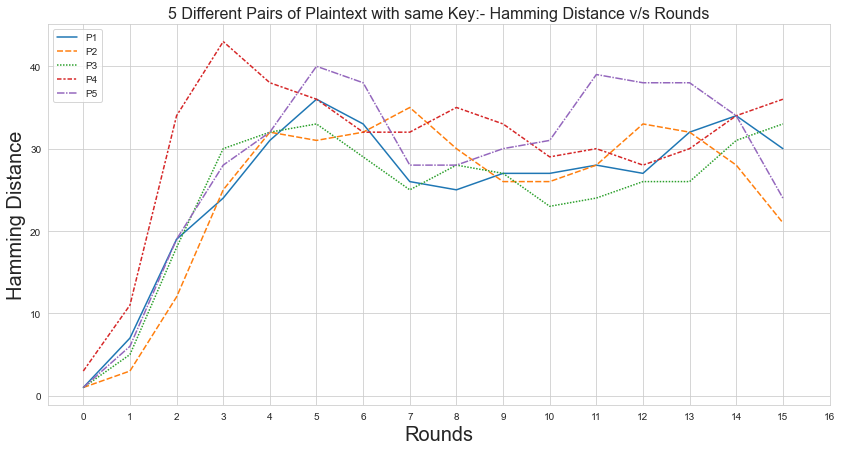

In [12]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
part1= pd.DataFrame({'P1':hamming_distances[0],'P2':hamming_distances[1],
                     'P3':hamming_distances[2],'P4':hamming_distances[3],
                     'P5':hamming_distances[4]},index=np.linspace(0,15,num=16))

plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
p=sns.lineplot(data=part1) 
p.set_xticks(range(17))
p.set_xlabel("Rounds", fontsize = 20)
p.set_ylabel("Hamming Distance", fontsize = 20)
p.set_title('5 Different Pairs of Plaintext with same Key:- Hamming Distance v/s Rounds', fontsize = 16)

Text(0.5, 1.0, '5 Different HD with same Key:- Hamming Distance v/s Rounds')

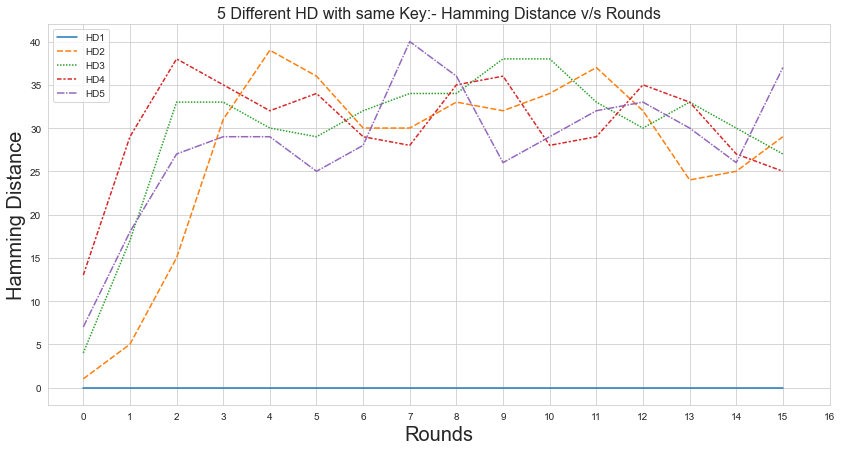

In [13]:
part2= pd.DataFrame({'HD1':hamming_distances[10],'HD2':hamming_distances[11],
                     'HD3':hamming_distances[12],'HD4':hamming_distances[13],
                     'HD5':hamming_distances[14]},index=np.linspace(0,15,num=16))

plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
p=sns.lineplot(data=part2) 
p.set_xticks(range(17))
p.set_xlabel("Rounds", fontsize = 20)
p.set_ylabel("Hamming Distance", fontsize = 20)
p.set_title('5 Different HD with same Key:- Hamming Distance v/s Rounds', fontsize = 16)

Text(0.5, 1.0, '5 Different Pairs of key with same plain text:- Hamming Distance v/s Rounds')

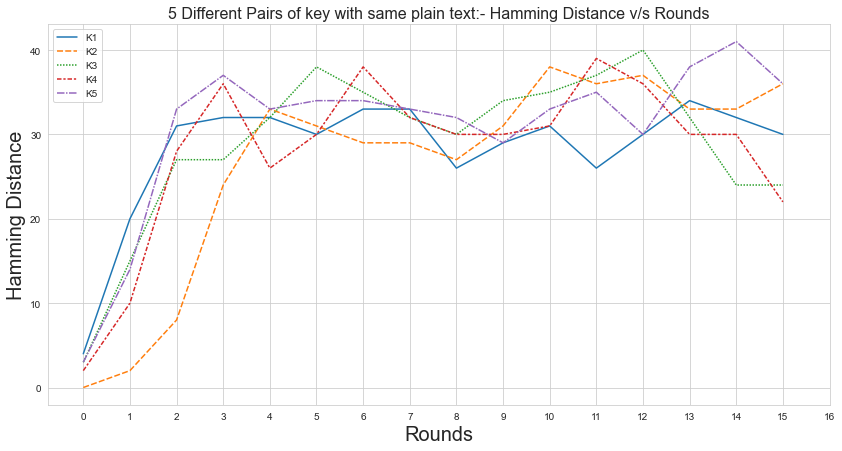

In [14]:
part3= pd.DataFrame({'K1':hamming_distances[5],'K2':hamming_distances[6],
                     'K3':hamming_distances[7],'K4':hamming_distances[8],
                     'K5':hamming_distances[9]},index=np.linspace(0,15,num=16))

plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
p=sns.lineplot(data=part3) 
p.set_xticks(range(17))
p.set_xlabel("Rounds", fontsize = 20)
p.set_ylabel("Hamming Distance", fontsize = 20)
p.set_title('5 Different Pairs of key with same plain text:- Hamming Distance v/s Rounds', fontsize = 16)